# Buyer GMVs and Retention

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import datetime

In [2]:
buyers=pd.read_excel('gmv_2020_2021.xlsx')
buyers.head()

,buyer,stock_gmv,auction_gmv,total_gmv,last_bid,last_stock,last_win,stock_last_90,bid_last_90,total_wins,total_bids,win_rate,wins_on_multi_bid,bids_within_10_percent
0,rue gilt,758819.10,3015213.0,3774032.10,2021-06-07,2021-05-11,2021-06-07,Y,Y,5010,12533,39.974467,1449,2970
1,the realreal,2034427.29,230365.0,2264792.29,2021-02-06,2021-06-08,2021-01-19,Y,N,64,286,22.377622,14,69
2,harley 2019,759469.30,735759.0,1495228.30,2021-06-07,2021-06-09,2021-06-07,Y,Y,467,2352,19.855442,142,669
3,marque luxury,16984.00,1033820.0,1050804.00,2021-05-30,2020-07-21,2021-05-30,N,Y,2022,6882,29.380994,354,1596
4,bagriculture,0.00,907040.0,907040.00,2021-06-06,NaT,2021-06-06,N,Y,1893,23889,7.924149,184,3039


In [3]:
emails=pd.read_csv('buyer_emails.csv')

In [4]:
emails['username']=emails['username'].str.lower()
emails['email']=emails['email'].str.lower()

In [2]:
leprix=list(emails[emails['email'].str.contains('leprix.com')]['username'])
leprix.append(['rtn+loveluxe', 'loveluxeboutique', 'vivasnobswap', 'mustloveshoes', 'soohee'])

buyers=buyers.drop(list(buyers.loc[buyers['buyer'].isin(leprix)].index))

print(leprix)

buyers.head()

NameError: name 'emails' is not defined

In [6]:
# buyers.to_excel('gmv_2020_2021.xlsx')

In [7]:
cols=['buyer', 'stock_gmv', 'auction_gmv', 'total_gmv',
       'last_stock', 'stock_last_90',  'last_bid', 'bid_last_90', 'last_win', 'total_wins',
       'total_bids', 'win_rate', 'wins_on_multi_bid',
       'bids_within_10_percent']

buyers=buyers[cols]
buyers.head()

,buyer,stock_gmv,auction_gmv,total_gmv,last_stock,stock_last_90,last_bid,bid_last_90,last_win,total_wins,total_bids,win_rate,wins_on_multi_bid,bids_within_10_percent
0,rue gilt,758819.10,3015213.0,3774032.10,2021-05-11,Y,2021-06-07,Y,2021-06-07,5010,12533,39.974467,1449,2970
1,the realreal,2034427.29,230365.0,2264792.29,2021-06-08,Y,2021-02-06,N,2021-01-19,64,286,22.377622,14,69
2,harley 2019,759469.30,735759.0,1495228.30,2021-06-09,Y,2021-06-07,Y,2021-06-07,467,2352,19.855442,142,669
3,marque luxury,16984.00,1033820.0,1050804.00,2020-07-21,N,2021-05-30,Y,2021-05-30,2022,6882,29.380994,354,1596
4,bagriculture,0.00,907040.0,907040.00,NaT,N,2021-06-06,Y,2021-06-06,1893,23889,7.924149,184,3039


In [8]:
buyers['last_bid']=pd.to_datetime(buyers['last_bid'])
buyers['last_stock']=pd.to_datetime(buyers['last_stock'])

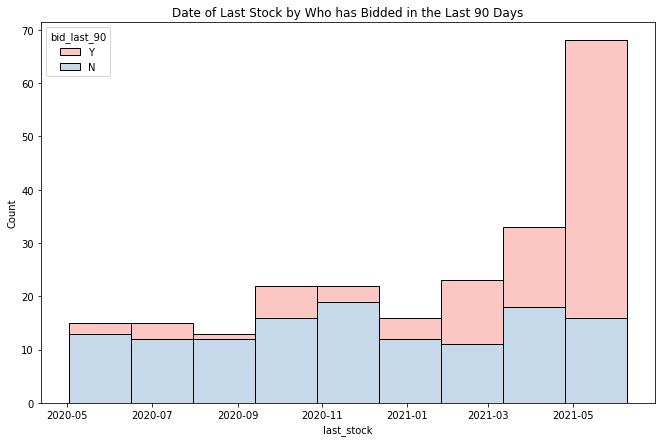

In [9]:
sns.set_palette('Pastel1')
plt.figure(figsize=(11,7))
sns.histplot(x='last_stock', data=buyers, hue='bid_last_90', multiple='stack')
plt.title('Date of Last Stock by Who has Bidded in the Last 90 Days')
plt.show()

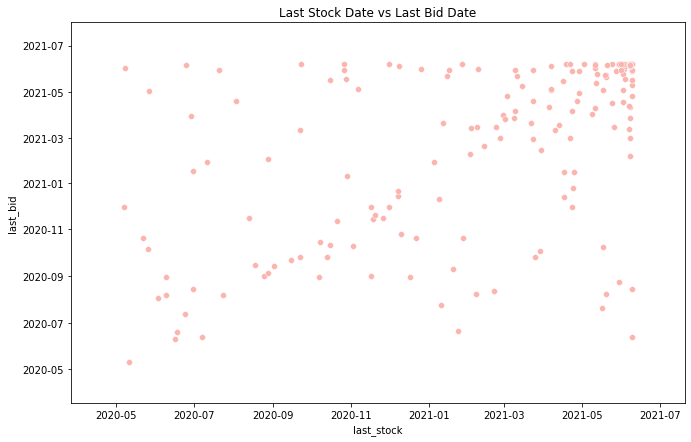

In [10]:
plt.figure(figsize=(11,7))
sns.scatterplot(x='last_stock', y='last_bid', data=buyers)
plt.title('Last Stock Date vs Last Bid Date')
plt.show()

In [11]:
bid_once_lost=buyers[(buyers['total_wins']==0) & (buyers['total_bids']==1)]

bid_once_lost.head()

,buyer,stock_gmv,auction_gmv,total_gmv,last_stock,stock_last_90,last_bid,bid_last_90,last_win,total_wins,total_bids,win_rate,wins_on_multi_bid,bids_within_10_percent
39,back by popular demand,33685.0,0.0,33685.0,2021-03-30,Y,2021-02-13,N,NaT,0,1,NaN,0,0
129,the luxury label - nashville,4511.0,0.0,4511.0,2021-06-04,Y,2021-05-18,Y,NaT,0,1,NaN,0,0
168,kim's lux goods,2197.0,0.0,2197.0,2021-03-24,Y,2021-04-19,Y,NaT,0,1,NaN,0,0
181,savvy consignment boutique,1572.0,0.0,1572.0,2020-11-17,N,2020-08-31,N,NaT,0,1,NaN,0,0
185,zippychicks,1395.0,0.0,1395.0,2021-02-07,N,2020-08-08,N,NaT,0,1,NaN,0,0


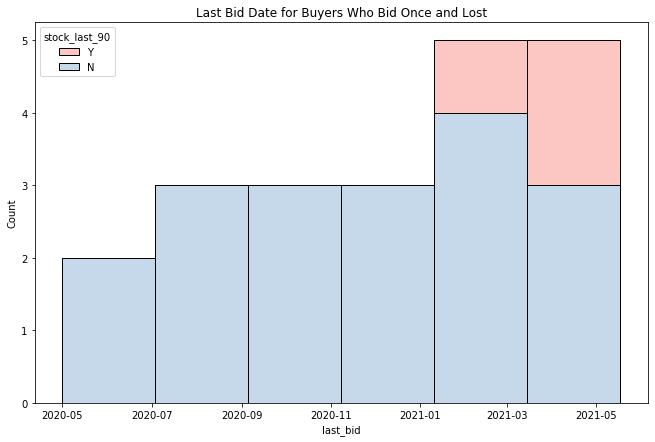

In [12]:
plt.figure(figsize=(11,7))
sns.histplot(x='last_bid', data=bid_once_lost, hue='stock_last_90', multiple='stack')
plt.title('Last Bid Date for Buyers Who Bid Once and Lost')
plt.show()

In [13]:
inactive=buyers[(buyers['stock_last_90']=='N') & (buyers['bid_last_90']=='N')]

inactive.sort_values(by='last_stock', ascending=False).head()

,buyer,stock_gmv,auction_gmv,total_gmv,last_stock,stock_last_90,last_bid,bid_last_90,last_win,total_wins,total_bids,win_rate,wins_on_multi_bid,bids_within_10_percent
220,savvy consignment wv,646.0,0.0,646.0,2021-03-11,N,NaT,N,NaT,0,0,NaN,0,0
170,from the archives,2159.0,0.0,2159.0,2021-02-26,N,2021-03-01,N,NaT,0,11,NaN,0,0
196,reflaunt,1112.0,0.0,1112.0,2021-02-24,N,NaT,N,NaT,0,0,NaN,0,0
210,strut shoetique,812.0,0.0,812.0,2021-02-23,N,NaT,N,NaT,0,0,NaN,0,0
114,monalisa_creations,5848.0,0.0,5848.0,2021-02-21,N,2020-08-12,N,NaT,0,7,NaN,0,3


In [14]:
inactive.to_excel('inactive_90+.xlsx')

In [15]:
buyers[buyers['last_bid'].dt.month==2]

,buyer,stock_gmv,auction_gmv,total_gmv,last_stock,stock_last_90,last_bid,bid_last_90,last_win,total_wins,total_bids,win_rate,wins_on_multi_bid,bids_within_10_percent
1,the realreal,2034427.29,230365.0,2264792.29,2021-06-08,Y,2021-02-06,N,2021-01-19,64,286,22.377622,14,69
39,back by popular demand,33685.00,0.0,33685.00,2021-03-30,Y,2021-02-13,N,NaT,0,1,NaN,0,0
136,consign sewickley,4017.00,0.0,4017.00,2021-02-02,N,2021-02-08,N,NaT,0,13,NaN,0,1
154,rtn+loveluxe,525.00,2278.0,2803.00,2020-08-28,N,2021-02-01,N,2021-02-01,6,72,8.333333,2,9
165,thirstykirsty111,2346.00,0.0,2346.00,2021-03-24,Y,2021-02-28,N,NaT,0,7,NaN,0,0
186,threads consignment boutique,1322.00,0.0,1322.00,2021-02-13,N,2021-02-19,N,NaT,0,1,NaN,0,0
263,auntie te's consignment,NaN,NaN,NaN,NaT,N,2021-02-05,N,NaT,0,5,NaN,0,0
287,leef luxury,NaN,NaN,NaN,NaT,N,2021-02-19,N,NaT,0,3,NaN,0,0
303,tales untold,NaN,NaN,NaN,NaT,N,2021-02-27,N,NaT,0,1,NaN,0,0


* 11 of the inactive accounts stopped buying stock in February
* Article Consignment has a high GMV and may be a valuable reengagement

In [16]:
bid_2020=pd.read_csv('2020AuctionBids.csv')
bid_2020['buyer']=bid_2020['buyer'].str.lower()

In [17]:
stock_ytd=pd.read_csv('stock_ytd.csv')
stock_ytd['buyer']=stock_ytd['buyer'].str.lower()

In [18]:
stock_2020=pd.read_csv('2020Stock.csv')
stock_2020['buyer']=stock_2020['buyer'].str.lower()

In [19]:
bid_ytd=pd.read_csv('bid_ytd.csv')
bid_ytd['buyer']=bid_ytd['buyer'].str.lower()

### Article Consignment (Inactive Since 2/2021)

In [20]:
ac=bid_2020[bid_2020['buyer']=='article consignment']

In [21]:
ac['win']='N'
ac.loc[ac['bid']>=ac['winning_price'], 'win']='Y'

ac.head()

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,auction_id,buyer_id,buyer,item_id,brand_name,category_name,title,overall_grade,min_bid,bid,winning_price,bid_placed_on,win
2855,166,201923,article consignment,1717516,Louis Vuitton,Totes,Neverfull GM,C,445.78,800,758.0,2020-05-24 00:18:35,Y
2856,166,201923,article consignment,1716720,Louis Vuitton,Totes,Louis Vuitton Monogram Neverfull,C,445.78,700,726.0,2020-05-24 00:30:17,N
2857,166,201923,article consignment,1716278,Louis Vuitton,Totes,Neverfull GM,C,455.26,775,747.0,2020-05-24 00:35:55,Y
2859,165,201923,article consignment,1714245,Louis Vuitton,Totes,Louis Vuitton Damier Neverfull GM,C,336.70,500,519.0,2020-05-24 00:38:14,N
2862,165,201923,article consignment,1715484,Fendi,Totes,"Zucchino (bag), tote bag",B,94.85,300,308.0,2020-05-24 00:40:21,N


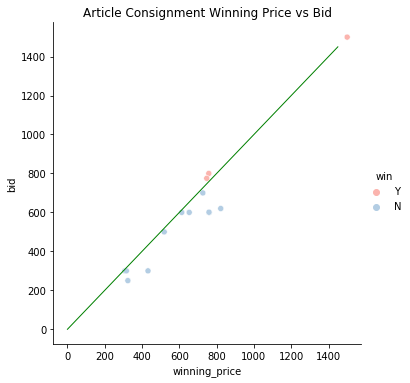

In [22]:
sns.relplot(x='winning_price', y='bid', data=ac, hue='win')
plt.plot([1450, 0], [1450, 0], linewidth=1, color='green')
plt.title('Article Consignment Winning Price vs Bid')
plt.show()

* Bids overall close to winning price; 6 bids within 10 percent
* Wins are very close to winning price; not too high
* Bids mostly on Louis Vuitton
* Have not bidded in a year

In [23]:
ac_stock=stock_ytd[stock_ytd['buyer']=='article consignment']
ac_stock.head()

,seller,user_id,buyer,item_id,brand_name,category_name,title,price,overall_grade,submitted_on,date,day_of_week,buyer_id
4938,camille+vtt,201923.0,article consignment,2288881,Goyard,Totes,St Louis PM,967.0,BC,2/11/21 0:20,2/11/21,3.0,NaN
4954,camille+vtt,201923.0,article consignment,2288893,Louis Vuitton,Crossbody Bags,"Louis Vuitton Siracusa Pm, Damier Azur",693.0,BC,2/11/21 0:20,2/11/21,3.0,NaN
4955,Next Innovation,201923.0,article consignment,2288842,Hermès,Belts,Hermes Belt,248.0,C,2/11/21 0:20,2/11/21,3.0,NaN
4971,Next Innovation,201923.0,article consignment,2288724,Gucci,Shoulder Bags,Gucci Flora Shoulder Bag Canvas Box,521.0,A,2/11/21 0:20,2/11/21,3.0,NaN
4973,jeannette+dct-ep,201923.0,article consignment,2286458,Louis Vuitton,Small Accessories,Louis Vuitton Set of 10 Lock & Key Cadena Key ...,393.0,B,2/11/21 0:20,2/11/21,3.0,NaN


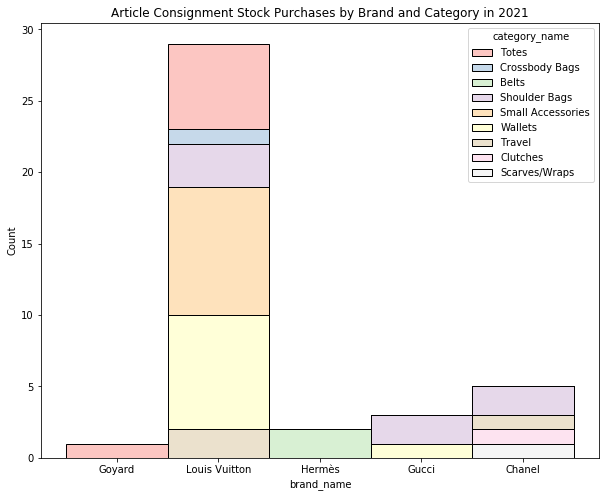

In [24]:
plt.figure(figsize=(10,8))
sns.histplot(x='brand_name', data=ac_stock, hue='category_name', multiple='stack')
plt.title('Article Consignment Stock Purchases by Brand and Category in 2021')
plt.show()

* Stock also favors LV; mostly small accessories and wallets
* Last stock on 2/21
* GMV of $53,879

### Mint Condition (Inactive since 1/21)

In [25]:
mc=stock_ytd[stock_ytd['buyer']=='mint condition']
mc.head()

,seller,user_id,buyer,item_id,brand_name,category_name,title,price,overall_grade,submitted_on,date,day_of_week,buyer_id
6020,camille+vtt,203576.0,mint condition,2197787,Louis Vuitton,Crossbody Bags,"Louis Vuitton Musette Gm, Monogram",499.0,B,1/20/21 10:46,1/20/21,2.0,NaN
6021,camille+vtt,203576.0,mint condition,2197791,Louis Vuitton,Crossbody Bags,"Louis Vuitton Cartouchiere MM, Monogram",585.0,B,1/20/21 10:46,1/20/21,2.0,NaN
6022,jeannette+dct-ep,203576.0,mint condition,2188560,Louis Vuitton,Crossbody Bags,"Louis Vuitton Amazone, Monogram",589.0,B,1/20/21 10:46,1/20/21,2.0,NaN
6023,camille+eLady_frontend,203576.0,mint condition,2080018,Louis Vuitton,Top Handles & Satchels,"Louis Vuitton Speedy 30, Monogram",837.0,A,1/20/21 10:46,1/20/21,2.0,NaN
7049,jeannette+dct-ep,NaN,mint condition,2646622,Fendi,Shoulder Bags,"Fendi Micro Peekaboo, Calfskin",678.0,NaN,NaN,NaN,NaN,203576.0


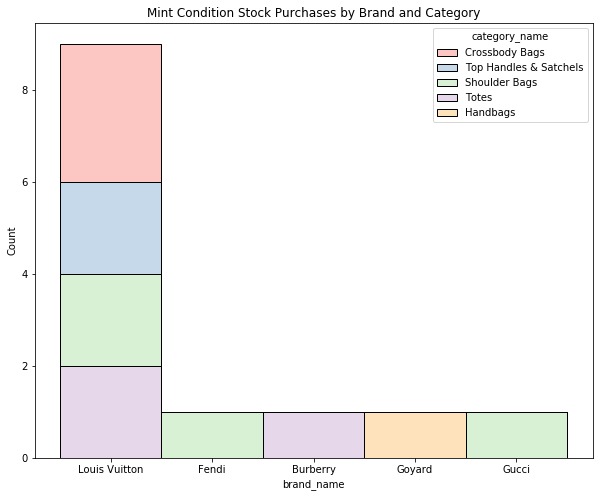

In [26]:
plt.figure(figsize=(10,8))
sns.histplot(x='brand_name', data=mc, hue='category_name', multiple='stack')
plt.title('Mint Condition Stock Purchases by Brand and Category')
plt.show()

* Never bidded before; stock in Louis Vuitton in 2021
* GMV of $37,781

### Agora Vintage (Inactive since 1/21)

In [27]:
av=stock_ytd[stock_ytd['buyer']=='agora vintage']
av.head()

,seller,user_id,buyer,item_id,brand_name,category_name,title,price,overall_grade,submitted_on,date,day_of_week,buyer_id
5887,Next Innovation,207275.0,agora vintage,2196715,Louis Vuitton,Travel,Louis Vuitton Monogram Keepall Bandouliere 60,667.0,B,1/25/21 13:50,1/25/21,0.0,NaN
5892,Camille+brandstreetTokyo,207275.0,agora vintage,2225437,Gucci,Shoulder Bags,Gucci GG Canvas Shoulder Bag Beige,202.0,C,1/25/21 15:03,1/25/21,0.0,NaN
5893,RS_JapanWholesale,207275.0,agora vintage,2214706,Gucci,Crossbody Bags,Gucci Disco Soho,670.0,AB,1/25/21 15:05,1/25/21,0.0,NaN


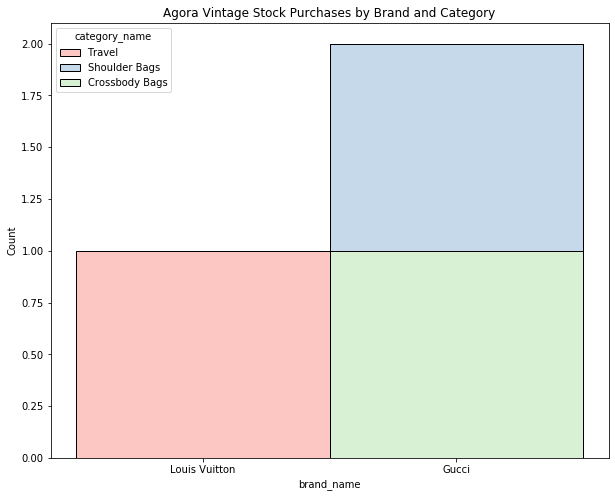

In [28]:
plt.figure(figsize=(10,8))
sns.histplot(x='brand_name', data=av, hue='category_name', multiple='stack')
plt.title('Agora Vintage Stock Purchases by Brand and Category')
plt.show()

* Only 3 stock purchases this year: 1 LV Keepall bag, 1 Gucci canvas shoulder bag, and 1 Gucci Disco Soho bag

### Revolve (Inactive since 2020)

In [29]:
rev=stock_2020[stock_2020['buyer']=='revolve']
rev.head()

,seller,buyer_id,buyer,item_id,brand_name,category_name,title,price
215,camille+glt,207173,revolve,1811467,Gucci,Shoulder Bags,Gucci Twins Hobo Guccissima Leather,569.0
216,MustLoveShoes,207173,revolve,1793445,Christian Dior,Totes,Christian Dior Book Tote Oblique Canvas,1805.0
217,MustLoveShoes,207173,revolve,1793442,Christian Dior,Shoulder Bags,Christian Dior Saddle Bag,605.0
218,MustLoveShoes,207173,revolve,1793443,Louis Vuitton,Wallets,Louis Vuitton Passport Holder,231.0
219,RTN+loveluxe,207173,revolve,1793473,Louis Vuitton,Shoulder Bags,Louis Vuitton Pochette Accessoires Multicolor,853.0


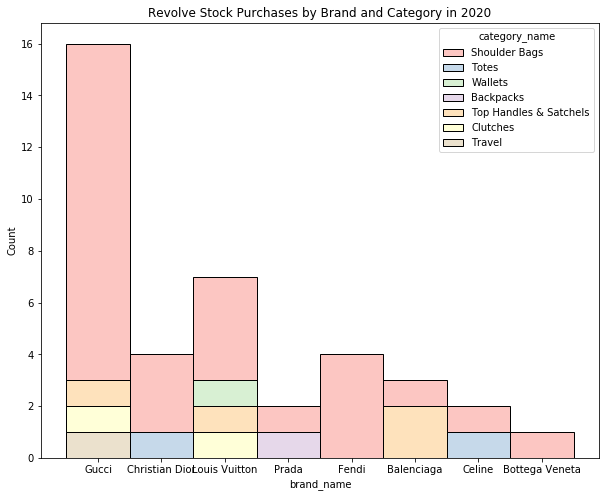

In [30]:
plt.figure(figsize=(10,8))
sns.histplot(x='brand_name', data=rev, hue='category_name', multiple='stack')
plt.title('Revolve Stock Purchases by Brand and Category in 2020')
plt.show()

* Has not purchased stock since 2020; has never bidded
* Mostly shoulder bags; Gucci favored

In [31]:
# plt.figure(figsize=(10,7))
# sns.scatterplot(x='total_gmv', y='total_wins', data=inactive, alpha=0.8)
# plt.title('Total GMV vs Number of Wins')
# # plt.ylim(-2,30)
# plt.show()

In [32]:
# plt.figure(figsize=(8,5))
# sns.scatterplot(x='total_wins', y='total_bids', data=inactive)
# plt.title('Number of Wins vs Number of Bids')
# plt.show()

In [33]:
tried=buyers[(buyers['total_wins']==0) & (buyers['total_bids']>0)].reset_index(drop=True)

tried=tried.sort_values(by='total_bids', ascending=False).reset_index(drop=True)

In [34]:
# tried.to_excel('bid_lost.xlsx')

In [35]:
start=datetime.datetime(2021,3,7)
active_bid=buyers[(buyers['last_bid']>start)]
active_stock=buyers[(buyers['last_stock']>start)]

In [36]:
active_buyers=active_bid.merge(active_stock, how='outer')

active_buyers.head()

,buyer,stock_gmv,auction_gmv,total_gmv,last_stock,stock_last_90,last_bid,bid_last_90,last_win,total_wins,total_bids,win_rate,wins_on_multi_bid,bids_within_10_percent
0,rue gilt,758819.10,3015213.0,3774032.10,2021-05-11,Y,2021-06-07,Y,2021-06-07,5010,12533,39.974467,1449,2970
1,harley 2019,759469.30,735759.0,1495228.30,2021-06-09,Y,2021-06-07,Y,2021-06-07,467,2352,19.855442,142,669
2,marque luxury,16984.00,1033820.0,1050804.00,2020-07-21,N,2021-05-30,Y,2021-05-30,2022,6882,29.380994,354,1596
3,bagriculture,0.00,907040.0,907040.00,NaT,N,2021-06-06,Y,2021-06-06,1893,23889,7.924149,184,3039
4,shopbop,585359.85,275740.0,861099.85,2021-06-08,Y,2021-06-07,Y,2021-06-06,410,2580,15.891473,118,504


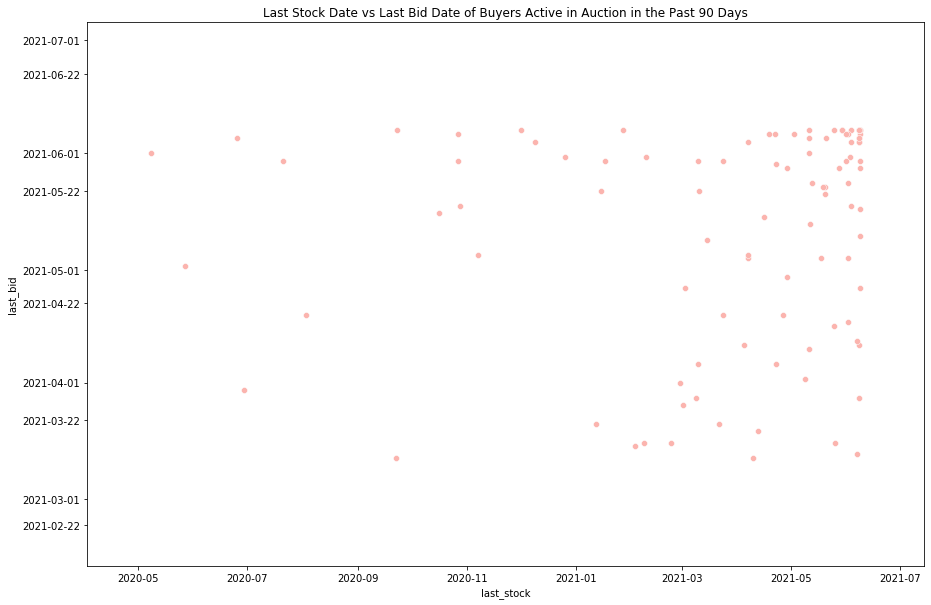

In [37]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='last_stock', y='last_bid', data=active_bid)
plt.title('Last Stock Date vs Last Bid Date of Buyers Active in Auction in the Past 90 Days')
plt.show()

### Rue Gilt (Active as of 6/21)

In [38]:
rg_bid=bid_ytd[bid_ytd['buyer']=='rue gilt']

In [39]:
rg_bid['win']='N'
rg_bid.loc[rg_bid['bid']>=rg_bid['winning_price'], 'win']='Y'

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


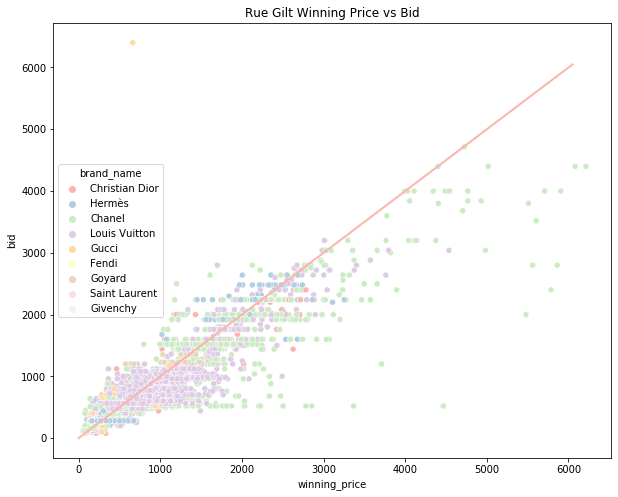

In [40]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='winning_price', y='bid', data=rg_bid, hue='brand_name')
plt.plot([6050, 0], [6050, 0], linewidth=2)
plt.title('Rue Gilt Winning Price vs Bid')
plt.show()

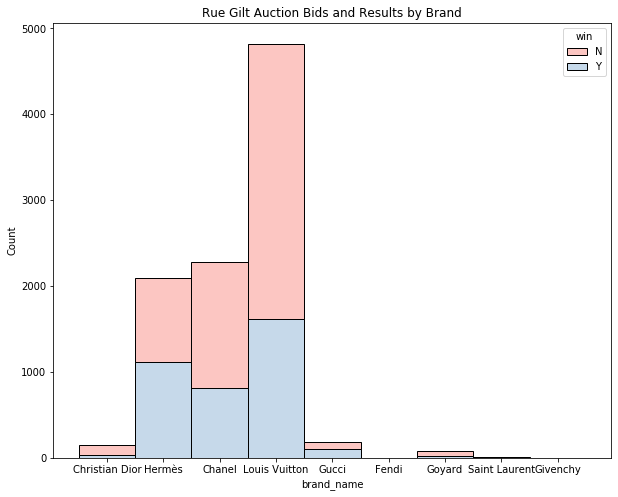

In [41]:
plt.figure(figsize=(10,8))
sns.histplot(x='brand_name', data=rg_bid, hue='win', multiple='stack')
plt.title('Rue Gilt Auction Bids and Results by Brand')
plt.show()

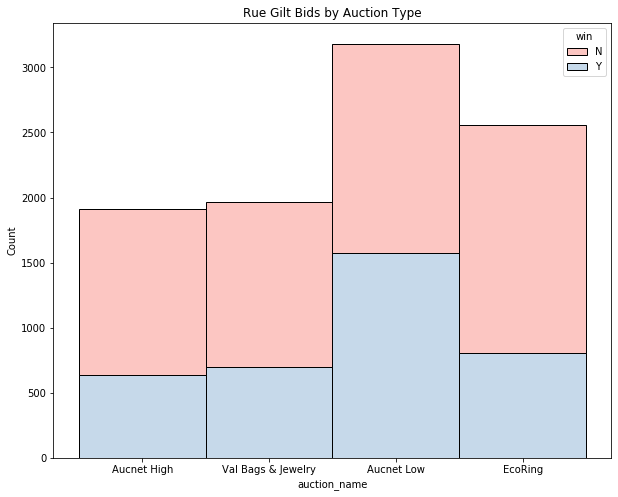

In [42]:
plt.figure(figsize=(10,8))
ax=sns.histplot(x='auction_name', data=rg_bid, hue='win', multiple='stack') 
plt.title('Rue Gilt Bids by Auction Type')
plt.show()

In [43]:
rg_item=list(rg_bid.item_id)

In [44]:
def multi_bid(list, bid):
    """
    Returns list of items with multiple bids
    
    Parameter list: the list of item ids
    Precondition: list is a non-empty list
    
    Parameter bid: the dataframe to search
    Precondition: bid is a dataframe with bid history
    """
    items=[]
    for i in list:
        count=bid[bid['item_id']==i].count()[0]
        if count>1:
            items.append(i)
    return items

multi_list=multi_bid(rg_item,bid_ytd)

In [45]:
rg_multi_bid=rg_bid[rg_bid['item_id'].isin(multi_list)]

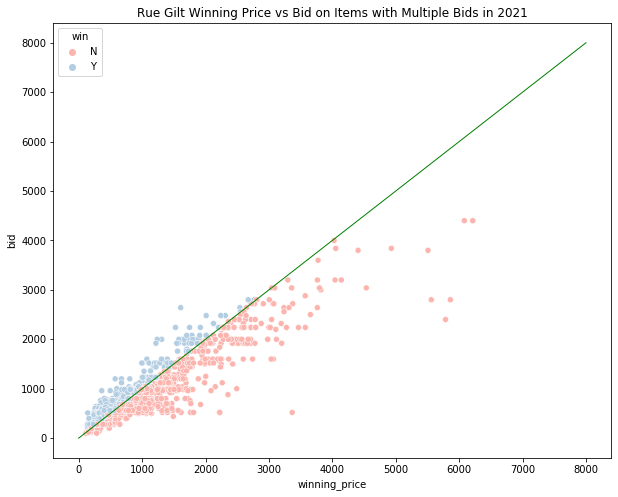

In [46]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='winning_price', y='bid', data=rg_multi_bid, hue='win')
plt.plot([8000, 0], [8000, 0], linewidth=1, color='green')
plt.title('Rue Gilt Winning Price vs Bid on Items with Multiple Bids in 2021')
plt.show()

In [47]:
lost_mult=rg_multi_bid.groupby('win')['bid'].count()[0]
won_mult=rg_multi_bid.groupby('win')['bid'].count()[1]

print('number of wins on items with multiple bids in 2021: {}'.format(won_mult))
print('number of losses on items with multiple bids in 2021: {}'.format(lost_mult))

number of wins on items with multiple bids in 2021: 847
number of losses on items with multiple bids in 2021: 1764


In [48]:
lost=rg_multi_bid[rg_multi_bid['win']=='N']

lost['within_10']='N'
lost.loc[(lost['bid'])>(lost['winning_price']*.9), 'within_10']='Y'

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [49]:
lost['within_10'].value_counts()

N    1131
Y     633
Name: within_10, dtype: int64

In [50]:
633/(1131+633)

0.358843537414966

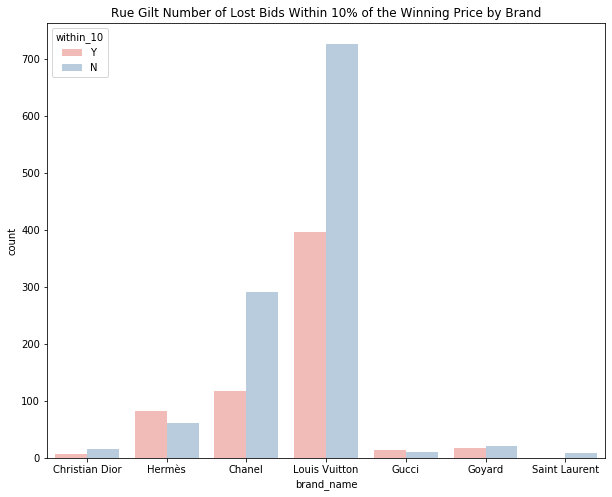

In [51]:
plt.figure(figsize=(10,8))
sns.countplot(x='brand_name', data=lost, hue='within_10')
plt.title('Rue Gilt Number of Lost Bids Within 10% of the Winning Price by Brand')
plt.show()

* Slightly over 600 of Rue Gilt's bids were within 10% on items they lost.
* Most of their lost bids on items with other bids were LV, and over 700 of those items were lost by more than 10%
* Their Hermès and Gucci bids were the only brands where most of their bids were within 10%

### Harley 2019 (Active as of 6/21)

In [52]:
har_bid=bid_ytd[bid_ytd['buyer']=='harley 2019']
har_bid['win']='N'
har_bid.loc[har_bid['bid']>=har_bid['winning_price'], 'win']='Y'

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


* Harley 2019 has a win rate of 18.60%; their GMV attribution is higher in stock than in bidding

In [53]:
har_stock=stock_ytd[stock_ytd['buyer']=='harley 2019']

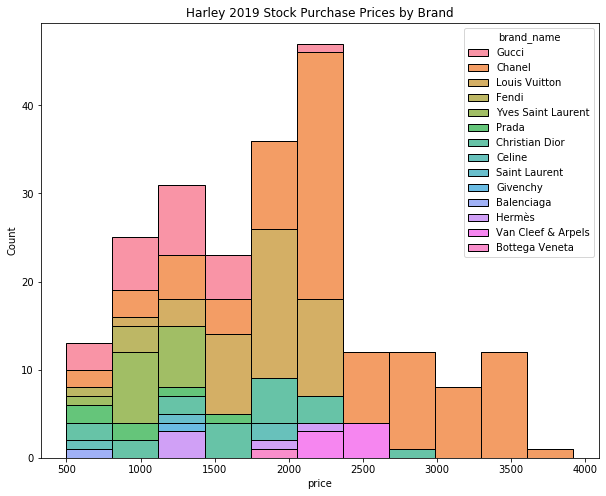

In [54]:
plt.figure(figsize=(10,8))
sns.histplot(x='price', data=har_stock, hue='brand_name', multiple='stack')
plt.title('Harley 2019 Stock Purchase Prices by Brand')
plt.show()

In [55]:
har_item=list(har_bid.item_id)

In [56]:
har_multi_list=multi_bid(har_item,bid_ytd)
har_multi_bid=har_bid[har_bid['item_id'].isin(har_multi_list)]

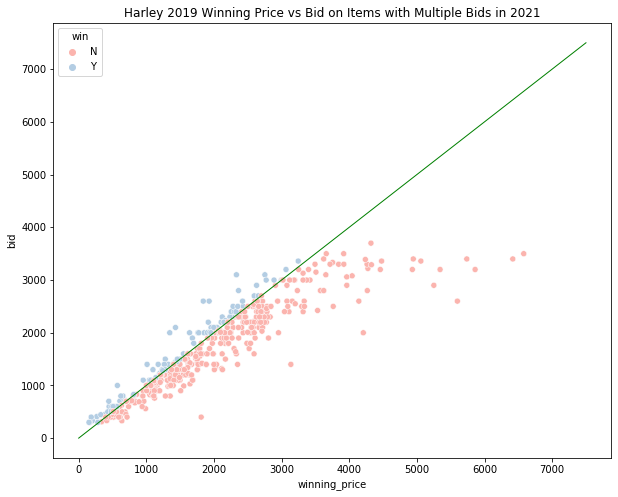

In [57]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='winning_price', y='bid', data=har_multi_bid, hue='win')
plt.plot([7500, 0], [7500, 0], linewidth=1, color='green')
plt.title('Harley 2019 Winning Price vs Bid on Items with Multiple Bids in 2021')
plt.show()

In [58]:
lost_mult=har_multi_bid.groupby('win')['bid'].count()[0]
won_mult=har_multi_bid.groupby('win')['bid'].count()[1]

print('number of wins on items with multiple bids in 2021: {}'.format(won_mult))
print('number of losses on items with multiple bids in 2021: {}'.format(lost_mult))

number of wins on items with multiple bids in 2021: 103
number of losses on items with multiple bids in 2021: 437


In [59]:
h_lost=har_multi_bid[har_multi_bid['win']=='N']

h_lost['within_10']='N'
h_lost.loc[(h_lost['bid'])>(h_lost['winning_price']*.9), 'within_10']='Y'

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [60]:
h_lost['within_10'].value_counts()

N    295
Y    142
Name: within_10, dtype: int64

In [61]:
142/(295+142)

0.32494279176201374

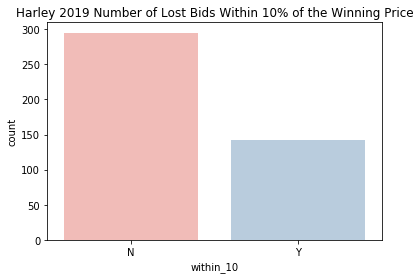

In [62]:
sns.countplot(x='within_10', data=h_lost)
plt.title('Harley 2019 Number of Lost Bids Within 10% of the Winning Price')
plt.show()

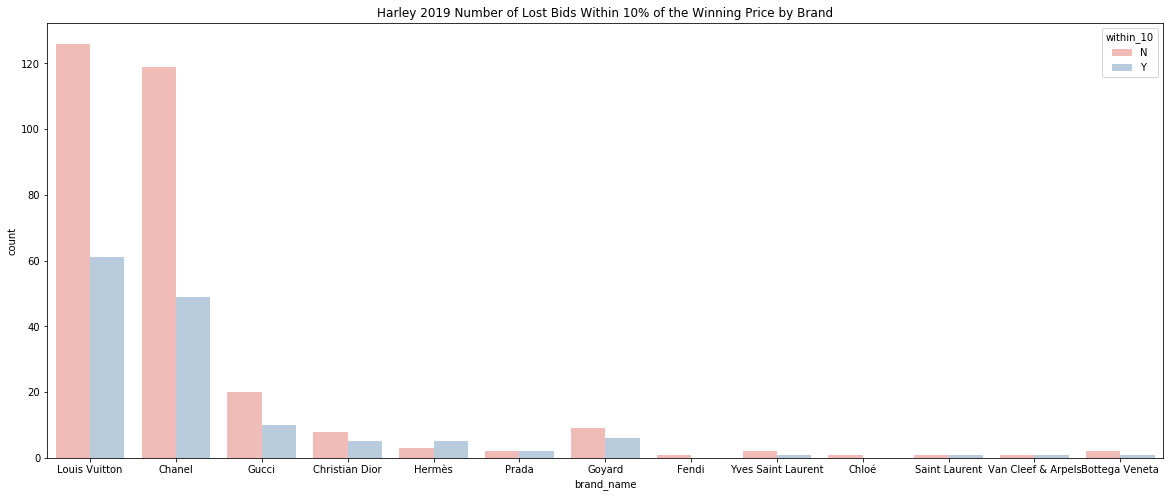

In [63]:
plt.figure(figsize=(20,8))
sns.countplot(x='brand_name', data=h_lost, hue='within_10')
plt.title('Harley 2019 Number of Lost Bids Within 10% of the Winning Price by Brand')
plt.show()

* Most of Harley 2019's bids on items with multiple bids were LV, but most of their bids were not within 10% of the winning price.

## HK Estate Jewels (Active as of 5/21)

* HK has never bidded in auction; only stock
* GMV of about $162,595

In [64]:
hk=stock_ytd[stock_ytd['buyer']=='hk estate jewels']

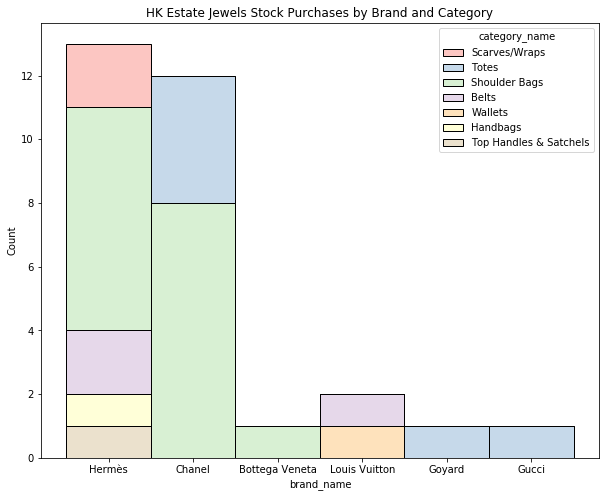

In [65]:
plt.figure(figsize=(10,8))
sns.histplot(x='brand_name', data=hk, hue='category_name', multiple='stack')
plt.title('HK Estate Jewels Stock Purchases by Brand and Category')
plt.show()

* Shoulder bags; favoring Hermès and Chanel
* Low count of items purchased

## Marque Luxury (Active as of 5/21)

* Has ONLY bidded; no stock
* High win rate overall of 35% and 700 total bids

In [66]:
ml=bid_ytd[bid_ytd['buyer']=='marque luxury']
ml['win']='N'
ml.loc[ml['bid']>=ml['winning_price'], 'win']='Y'

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


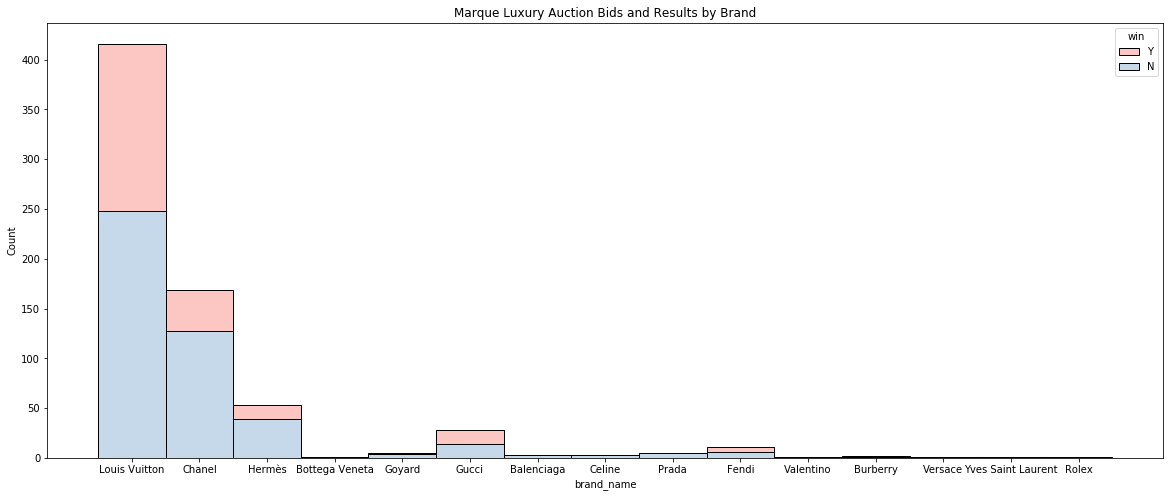

In [67]:
plt.figure(figsize=(20,8))
sns.histplot(x='brand_name', data=ml, hue='win', multiple='stack')
plt.title('Marque Luxury Auction Bids and Results by Brand')
plt.show()

In [68]:
ml_item=list(ml.item_id)
ml_multi_list=multi_bid(ml_item,bid_ytd)
ml_multi_bid=ml[ml['item_id'].isin(ml_multi_list)]

In [69]:
ml_lost=ml_multi_bid[ml_multi_bid['win']=='N']

ml_lost['within_10']='N'
ml_lost.loc[(ml_lost['bid'])>(ml_lost['winning_price']*.9), 'within_10']='Y'

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


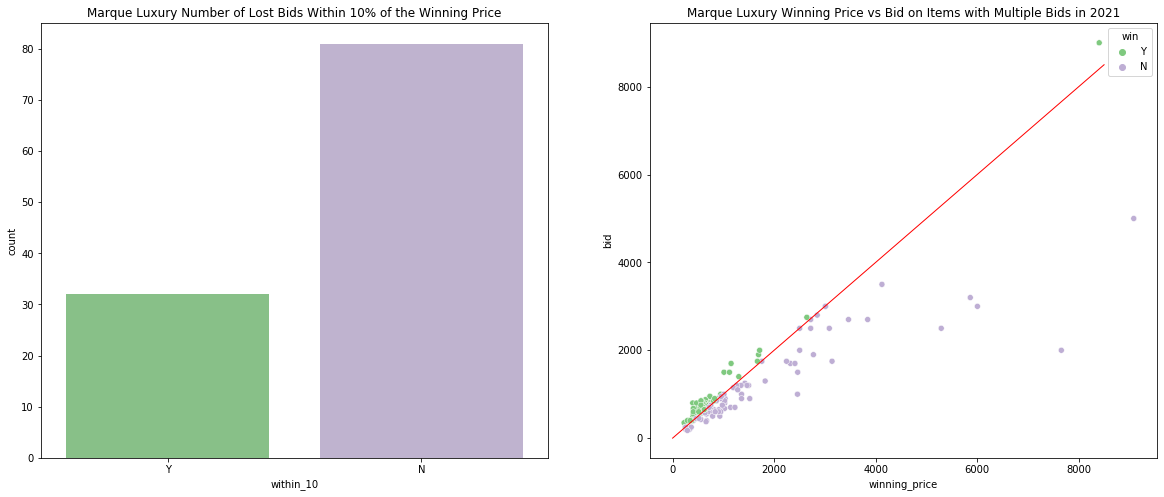

In [70]:
fig,axes=plt.subplots(1, 2, figsize=(20,8))
sns.set_palette('Accent')
ax1=(sns.scatterplot(x='winning_price', y='bid', data=ml_multi_bid, hue='win', ax=axes[1])
     .set(title='Marque Luxury Winning Price vs Bid on Items with Multiple Bids in 2021'))
    
plt.plot([8500, 0], [8500, 0], linewidth=1, color='red')

ax2=sns.countplot(x='within_10', data=ml_lost, order=['Y', 'N'], ax=axes[0]).set(title='Marque Luxury Number of Lost Bids Within 10% of the Winning Price')
plt.show()

* While ML has a high win rate overall, from this graph it appears that the lost auctions on bids with multiple items were lost by a large margin

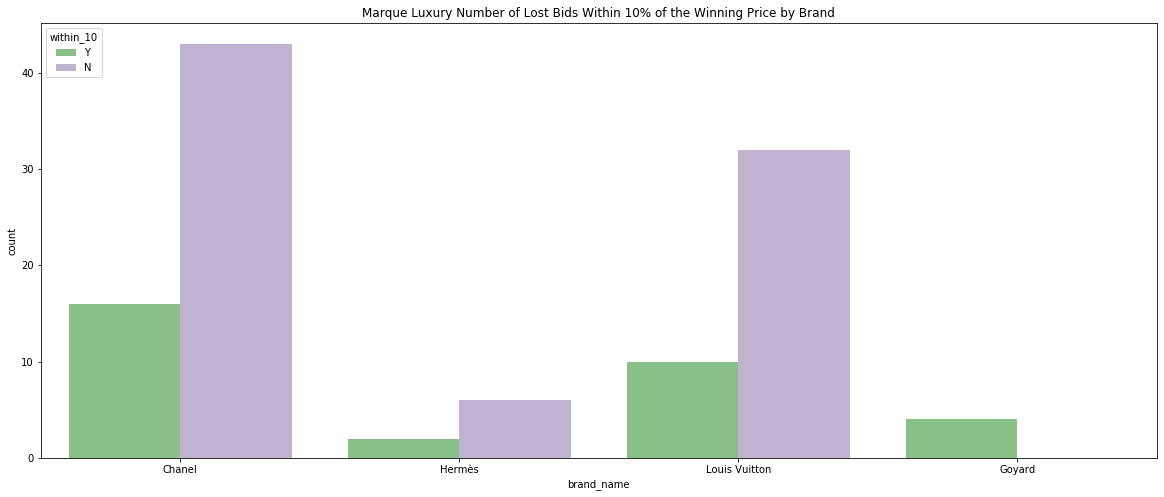

In [71]:
plt.figure(figsize=(20,8))
sns.countplot(x='brand_name', data=ml_lost, hue='within_10', hue_order=['Y', 'N'])
plt.title('Marque Luxury Number of Lost Bids Within 10% of the Winning Price by Brand')
plt.show()

In [72]:
ml_lost['within_10'].value_counts()

N    81
Y    32
Name: within_10, dtype: int64

In [73]:
31/(81+32)

0.2743362831858407

* ML lost most on Chanel items with multiple bids and tended to be outside of 10% of the winning price

In [74]:
ml_lost[(ml_lost['brand_name']=='Chanel')]['title'].unique()

array(['Chanel Matorasse Deca Matorasse shoulder bag',
       'Chanel Lambskin  Large Quilted 13813048 Black  Gold Shoulder Bag',
       'Chanel 29 Series Chevron  Plate Handle Chain Shoulder Bag',
       'Chanel Matorasse Matorasse 25 ram black 3 series shoulder bag',
       'Chanel Quilted W Flap Chain Shoulder Bag',
       'Chanel Paris limited W flap lambskin double flap No. 0 shoulder bag',
       'Chanel lambskin lambskin Kokomaku chain backpack black backpack',
       'Chanel Matorasse Matorasse 25 lamb black 0 series shoulder bag',
       'Chanel Matorasse Vintage bracket double chain shoulder bag shoulder bag',
       'Chanel Matorasse Matorasse caviar black 5 series business bag',
       'Chanel Caviar  Gst Chain Tote Bag Black Gold Hardware A50995 8 Series',
       'Chanel lambskin Chanel Gold Matorasse 23086088 AB shoulder bag',
       'Chanel Matorasse Matorasse shoulder bag',
       'Chanel A01112 suede W flap Matorasse chain shoulder shoulder bag',
       'Chanel Coco pr

In [75]:
ml_multi_win=ml_multi_bid[ml_multi_bid['win']=='Y']

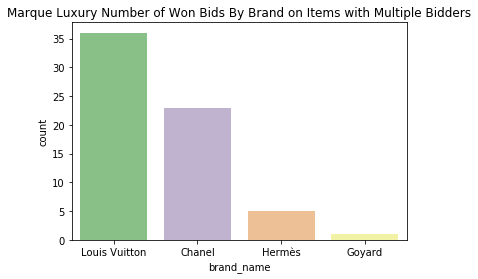

In [76]:
sns.countplot(x='brand_name', data=ml_multi_win,)
plt.title('Marque Luxury Number of Won Bids By Brand on Items with Multiple Bidders')
plt.show()

* When ML has won on bids with multiple bidders, it is usually LV, with some Chanel as well

In [77]:
inactive[inactive['last_bid']>inactive['last_stock']]

,buyer,stock_gmv,auction_gmv,total_gmv,last_stock,stock_last_90,last_bid,bid_last_90,last_win,total_wins,total_bids,win_rate,wins_on_multi_bid,bids_within_10_percent
44,dlc,11906.0,18541.0,30447.0,2020-08-25,N,2020-08-31,N,2020-08-28,59,388,15.206186,9,55
45,uptown bombshell boutique,2748.0,26708.0,29456.0,2020-06-03,N,2020-08-02,N,2020-06-28,25,175,14.285714,15,36
85,authentic purse alberta,1519.0,9780.0,11299.0,2020-05-22,N,2020-10-20,N,2020-10-20,15,54,27.777778,10,14
107,la esquina jewelers,1240.0,5740.0,6980.0,2020-05-26,N,2020-10-06,N,2020-08-24,21,135,15.555556,5,22
115,my closet rocks,5433.0,254.0,5687.0,2020-10-21,N,2020-11-12,N,2020-10-23,1,46,2.173913,0,2
123,han luxury,5148.0,0.0,5148.0,2020-08-28,N,2020-09-05,N,NaT,0,29,NaN,0,0
126,bliss spa & salon,4566.0,372.0,4938.0,2020-06-30,N,2021-01-17,N,2020-07-05,2,109,1.834862,1,6
128,stafford jewelers,3757.0,848.0,4605.0,2020-06-30,N,2020-08-14,N,2020-06-27,1,47,2.127660,0,4
136,consign sewickley,4017.0,0.0,4017.0,2021-02-02,N,2021-02-08,N,NaT,0,13,NaN,0,1
147,threads boutique & consignment,3243.0,0.0,3243.0,2020-06-09,N,2020-08-30,N,NaT,0,8,NaN,0,0
